# IMPORTING NECESSARY LIBRARIES 

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm as svm_model
from sklearn.metrics import classification_report,  roc_curve,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score


In [2]:
#Reading the dataset
Loan=pd.read_csv('loan_approval_dataset.csv')

#Previewing the first 5 rows
Loan.head()



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
#Previewing the last 5 rows
Loan.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [4]:
#Viewing the rows and features
Loan.shape

(4269, 13)

In [5]:
#viewing the statistical summary of the dataset
Loan.describe()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [15]:
#viewing the summary of the dataframe
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [77]:
#checking the null values of each feature
Loan.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [52]:
#viewing the data type of each feature
Loan.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [78]:
print(Loan.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [6]:
# Remove leading and trailing whitespaces from column names
Loan.columns = Loan.columns.str.strip()


# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

Text(0.5, 1.0, 'Loan Amount vs bank_asset_value')

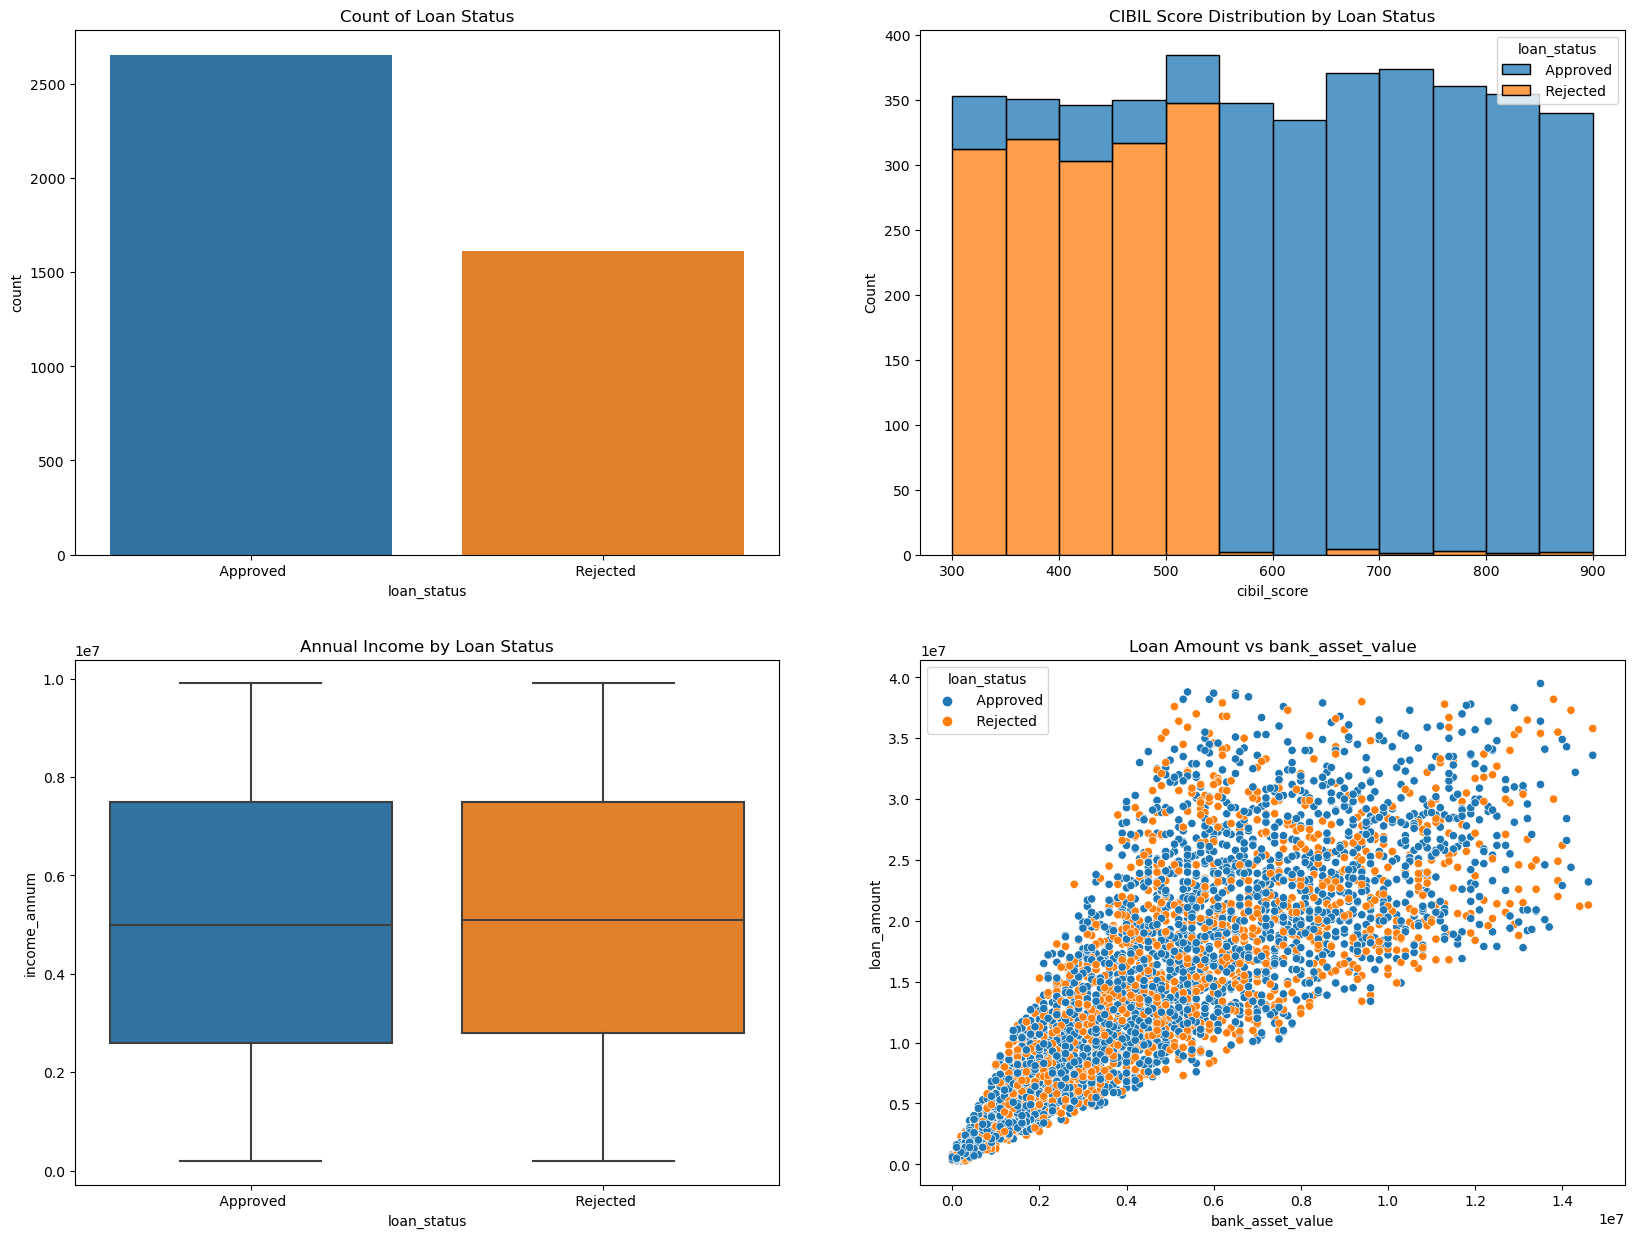

In [7]:
plt.figure(figsize=(20, 15))

# Bar plot showing the count of approved and rejected loans
plt.subplot(2, 2, 1)
sns.countplot(data=Loan, x='loan_status')
plt.title('Count of Loan Status')

# Histogram of CIBIL scores divided by loan status
plt.subplot(2, 2, 2)
sns.histplot(data=Loan, x='cibil_score', hue='loan_status', multiple='stack', binwidth=50)
plt.title('CIBIL Score Distribution by Loan Status')

# Boxplot comparing the income of approved and rejected loans
plt.subplot(2, 2, 3)
sns.boxplot(data=Loan, y='income_annum', x='loan_status')
plt.title('Annual Income by Loan Status')

# Scatter plot of loan amount vs income, colored by loan status
plt.subplot(2, 2, 4)
sns.scatterplot(data=Loan, x='bank_asset_value', y='loan_amount', hue='loan_status')
plt.title('Loan Amount vs bank_asset_value')





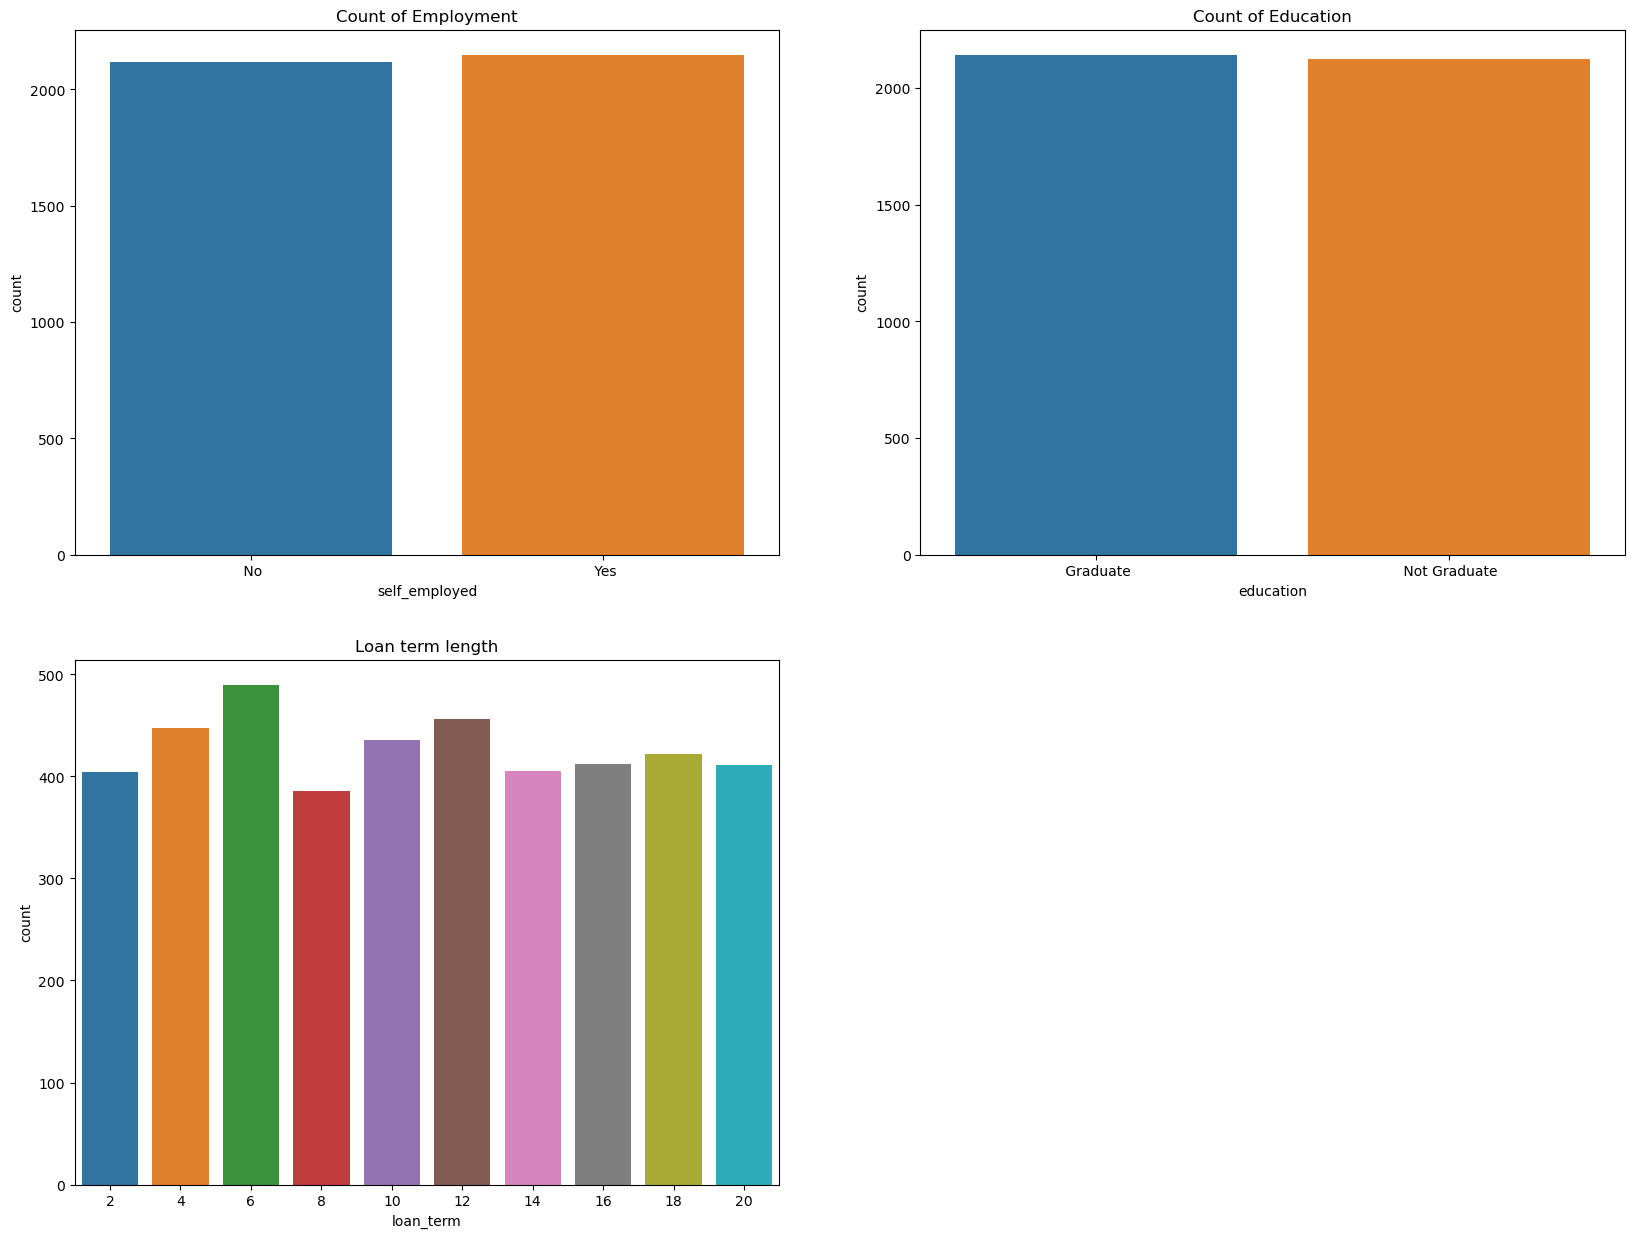

<Figure size 640x480 with 0 Axes>

In [29]:
#count plot for employment
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.countplot(data=Loan, x='self_employed')
plt.title('Count of Employment')

#count plot for education
plt.subplot(2, 2, 2)
sns.countplot(data=Loan, x='education')
plt.title('Count of Education')

# Bar plot for loan term length
plt.subplot(2, 2, 3)
sns.countplot(x='loan_term', data=Loan)
plt.title('Loan term length')
plt.show()
plt.tight_layout()
plt.show()
plt.show()



<Axes: xlabel='education', ylabel='count'>

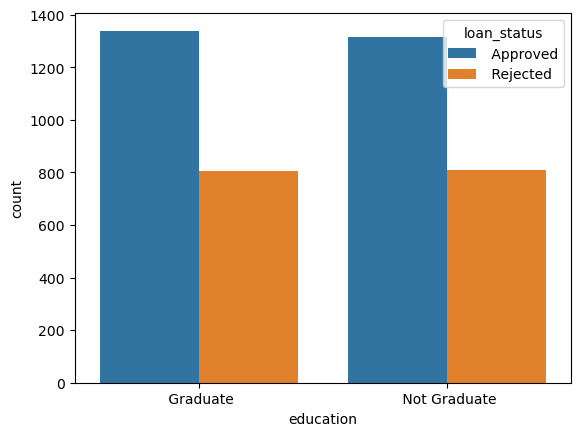

In [18]:
#This code utilizes Seaborn's countplot to visualize the distribution of loan statuses across different education levels. 
sns.countplot(x='education',hue='loan_status',data=Loan)


<Axes: xlabel='self_employed', ylabel='count'>

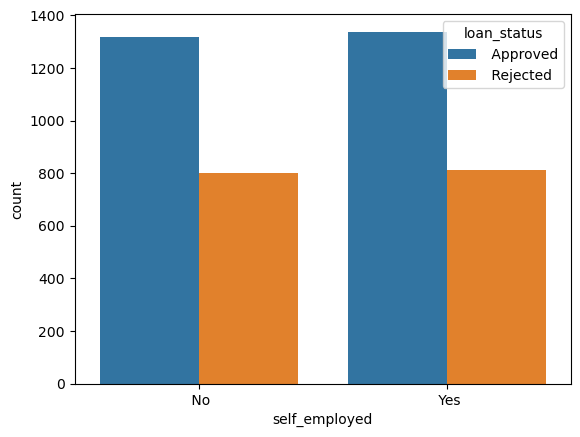

In [19]:
#This code utilizes Seaborn's countplot to visualize the distribution of loan statuses across different employment levels. 
sns.countplot(x='self_employed',hue='loan_status',data=Loan)


PLOTTING HISTOGRAM OF EACH FEATURE

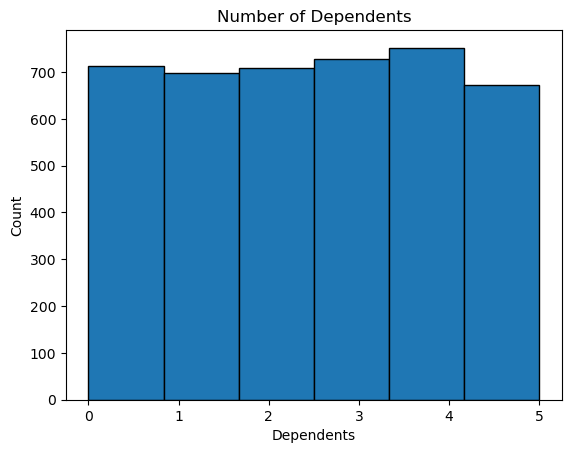

In [20]:
import matplotlib.pyplot as plt

# Assuming Loan['no_of_dependents'] is a valid data column

# Histogram for the number of dependents
plt.hist(Loan['no_of_dependents'], bins=6, edgecolor='black')
plt.title('Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()



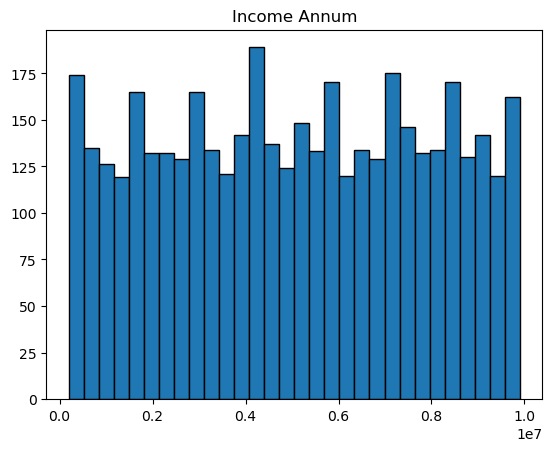

In [21]:
#Histogram for income
plt.hist(Loan['income_annum'], bins=30,edgecolor='black')
plt.title('Income Annum')
plt.show()



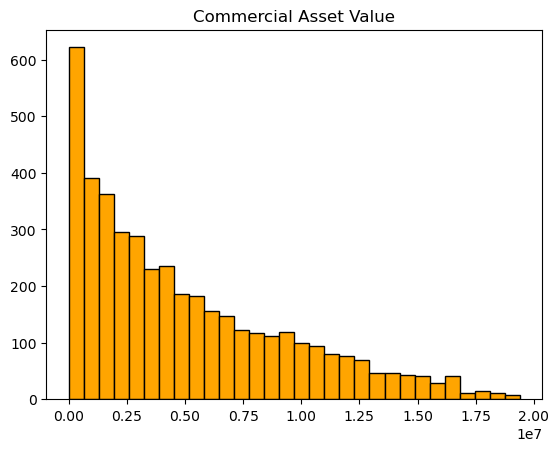

In [22]:
#Histogram of commercial_assets_value
plt.hist(Loan['commercial_assets_value'], bins=30,color='orange',edgecolor='black')
plt.title('Commercial Asset Value')
plt.show()


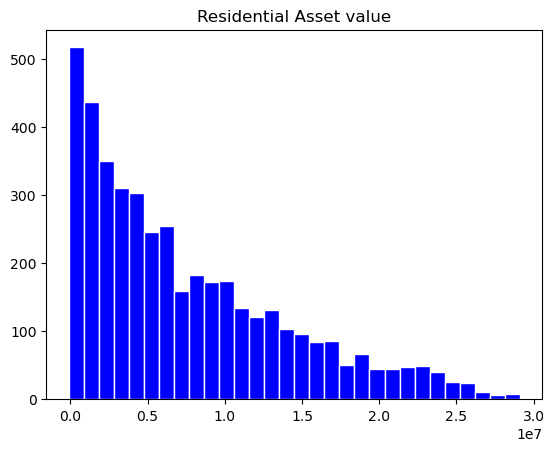

In [23]:
#Histogram of residential_assets_value
plt.hist(Loan['residential_assets_value'], bins=30, color='blue',edgecolor='white')
plt.title('Residential Asset value')
plt.show()

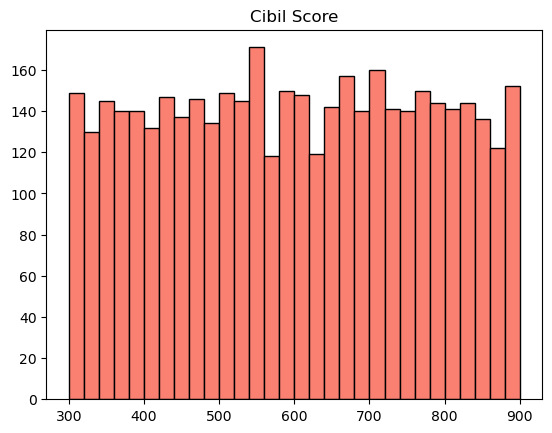

In [24]:
#Histogram of cibil score
plt.hist(Loan['cibil_score'], bins=30, color='salmon',edgecolor='black')
plt.title('Cibil Score')
plt.show()

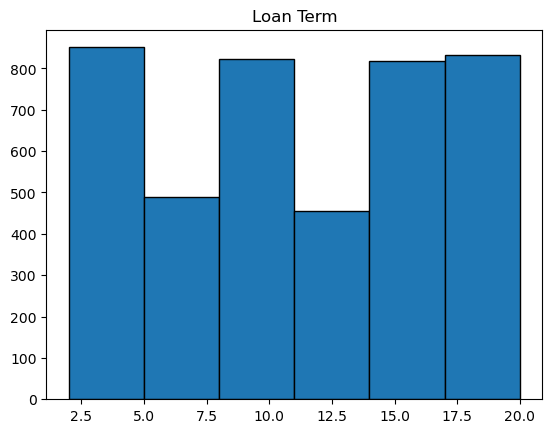

In [25]:
#Histogram of loan term
plt.hist(Loan['loan_term'], bins=6,edgecolor='black')
plt.title('Loan Term')
plt.show()

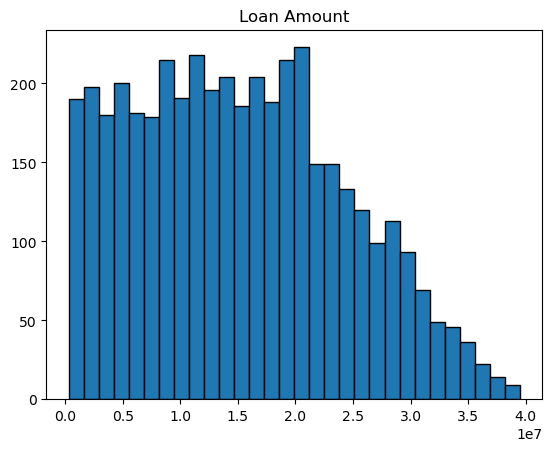

In [26]:
#Histogram of loan amount
plt.hist(Loan['loan_amount'], bins=30,edgecolor='black')
plt.title('Loan Amount')
plt.show()


In [ ]:
PLOTTING BOXPLOT TO VISUALIZE OUTLIERS IN DATA

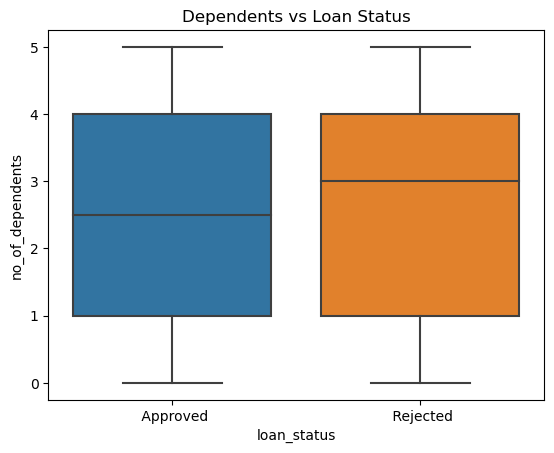

In [27]:
# Boxplot dependents vs loan status classification
sns.boxplot(x='loan_status', y='no_of_dependents', data=Loan)
plt.title('Dependents vs Loan Status')
plt.show()

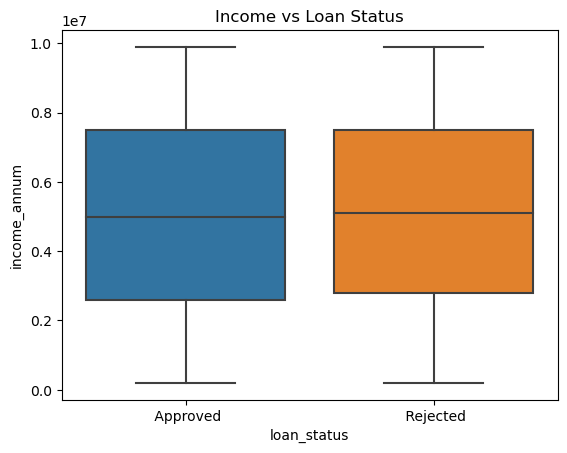

In [28]:
#Boxplot income vs loan status classification
sns.boxplot(x='loan_status', y='income_annum', data=Loan)
plt.title('Income vs Loan Status')
plt.show()

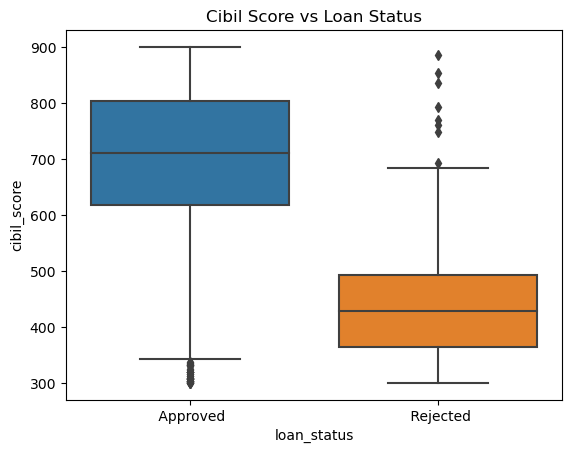

In [30]:
#Boxplot cibil score vs loan status classification
sns.boxplot(x='loan_status', y='cibil_score', data=Loan)
plt.title('Cibil Score vs Loan Status')
plt.show()

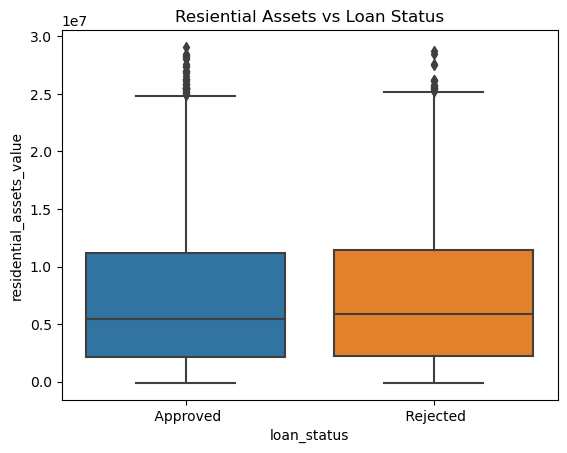

In [30]:
#Boxplot residential assets vs loan status classification
sns.boxplot(x='loan_status', y='residential_assets_value', data=Loan)
plt.title('Resiential Assets vs Loan Status')
plt.show()

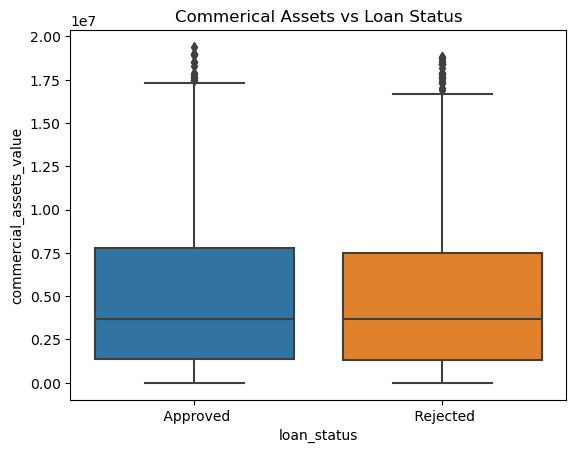

In [31]:
# Boxplot commerical assets vs loan status classification
sns.boxplot(x='loan_status', y='commercial_assets_value', data=Loan)
plt.title('Commerical Assets vs Loan Status')
plt.show()

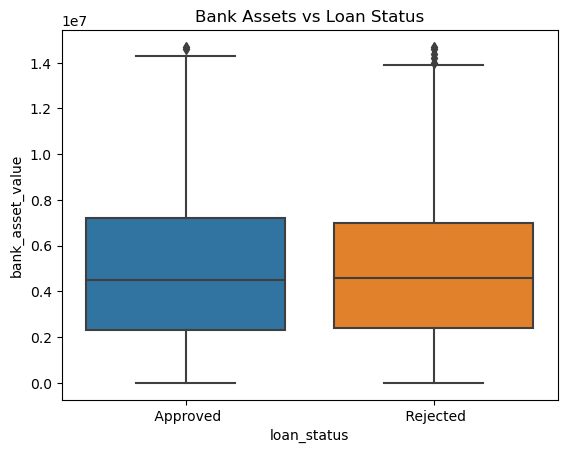

In [26]:
# Boxplot bank assets vs loan status classification
sns.boxplot(x='loan_status', y='bank_asset_value', data=Loan)
plt.title('Bank Assets vs Loan Status')
plt.show()



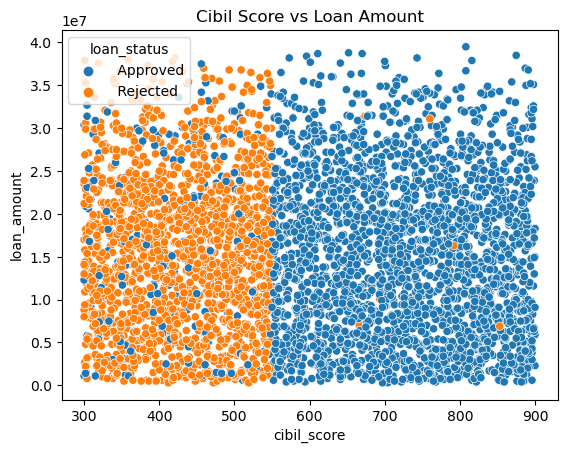

In [27]:
# Scatterplot Cibil Score vs Loan Amount colored by Loan status
sns.scatterplot(x='cibil_score', y='loan_amount', hue='loan_status', data=Loan)
plt.title('Cibil Score vs Loan Amount')
plt.show()

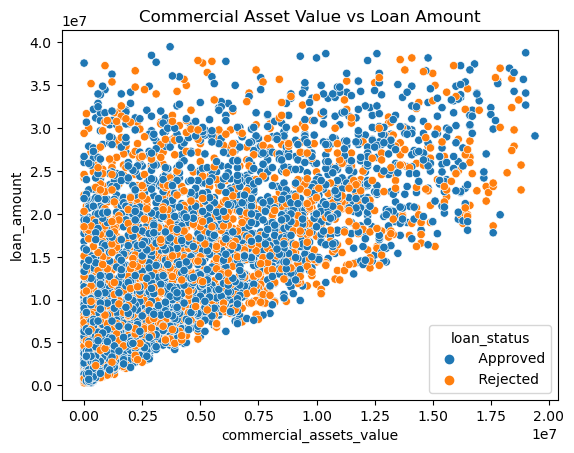

In [28]:
# Scatterplot Cibil Score vs Loan Amount colored by Loan status
sns.scatterplot(x='commercial_assets_value', y='loan_amount', hue='loan_status', data=Loan)
plt.title('Commercial Asset Value vs Loan Amount')
plt.show()

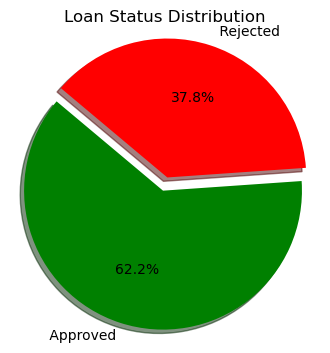

In [81]:
# Extracting counts of different loan statuses
status_counts = Loan['loan_status'].value_counts()

# Data to plot
labels = status_counts.index
sizes = status_counts.values
colors = ['green', 'red']  
explode = (0.1, 0)  

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Loan Status Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


DATA PRE-PROCESSING


In [8]:
#Converting the categorical and target variables to numerical values
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Use label encoder to transform 'education column
Loan['education'] = label_encoder.fit_transform(Loan['education'])
Loan['self_employed'] = label_encoder.fit_transform(Loan['self_employed'])

# Apply label encoding to the 'loan_status' column
Loan['loan_status'] = label_encoder.fit_transform(Loan['loan_status'])

Loan.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [9]:
print(Loan[['education', 'self_employed','loan_status']])


      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


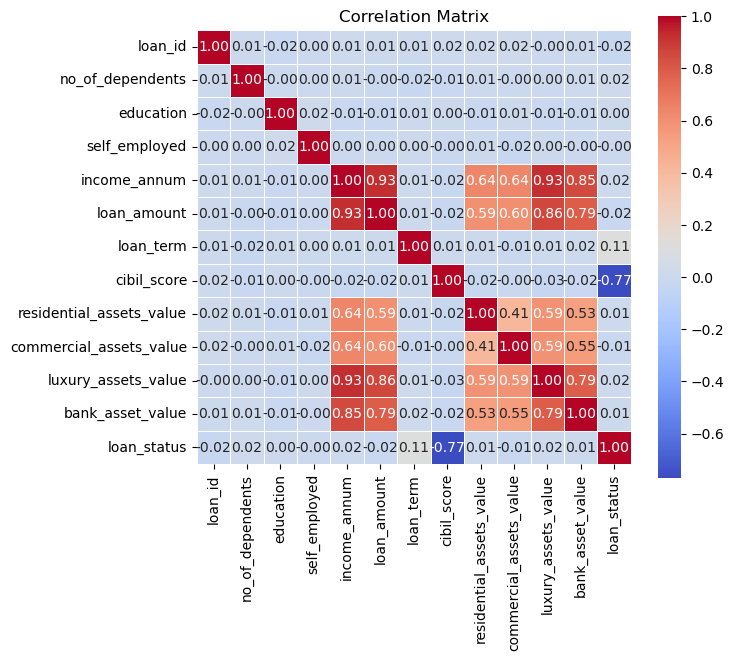

In [83]:
plt.figure(figsize=(7, 6))  # Adjust the figure size as per your preference
corr_matrix = Loan.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.xticks(fontsize=10)  # Adjust font size of x-axis labels
plt.yticks(fontsize=10)  # Adjust font size of y-axis labels
plt.title('Correlation Matrix', fontsize=12)  # Add a title with adjusted font size
plt.show()


CHECKING FOR THE TOP TEN FEATURES

In [10]:
# Define the feature columns (X) and target column (y)
X = Loan.drop(columns=['loan_status'])  # Drop 'loan_status' column to get feature columns
y = Loan['loan_status']  # Target variable

# SelectKBest with ANOVA F-value test to select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Get the F-values of the selected features
f_values = selector.scores_[selected_indices]

# Create a dictionary to store feature names and their corresponding F-values
feature_f_values = dict(zip(selected_features, f_values))

# Sort the dictionary based on F-values in descending order
sorted_feature_f_values = dict(sorted(feature_f_values.items(), key=lambda item: item[1], reverse=True))

# Print the top 10 features with their corresponding F-values
top_10_features = list(sorted_feature_f_values.keys())[:10]
top_10_f_values = list(sorted_feature_f_values.values())[:10]
for feature, f_value in zip(top_10_features, top_10_f_values):
    print(f"Feature: {feature}, F-value: {f_value}")


Feature: cibil_score, F-value: 6235.054590534256
Feature: loan_term, F-value: 55.22545796738981
Feature: no_of_dependents, F-value: 1.4006001729702904
Feature: loan_id, F-value: 1.3349674319819718
Feature: loan_amount, F-value: 1.1131763752970667
Feature: luxury_assets_value, F-value: 1.020728281020977
Feature: income_annum, F-value: 0.9846688347948409
Feature: residential_assets_value, F-value: 0.8808766992878724
Feature: commercial_assets_value, F-value: 0.29015159308571714
Feature: bank_asset_value, F-value: 0.19606590791214007


#BALANCING THE DATASET TO AVOID BIAS

In [11]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the shape of the resampled dataset
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)



Shape of X_resampled: (5312, 12)
Shape of y_resampled: (5312,)


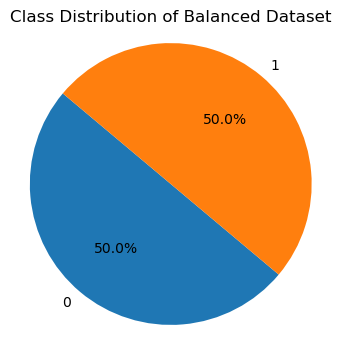

In [12]:
# Calculate the class distribution of the balanced dataset
class_distribution = y_resampled.value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Balanced Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


SPLITTING THE DATASET 80:20

In [13]:
# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4249, 12)
Shape of y_train: (4249,)
Shape of X_test: (1063, 12)
Shape of y_test: (1063,)


#SCALING THE VARIABLES

In [14]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing set (using the same scaler from the training set)
X_test_scaled = scaler.transform(X_test)

# Ensure both the training and testing sets are properly scaled
# Print the first few rows of the scaled training set (X_train_scaled)
print("Scaled Training Set (X_train_scaled):")
print(X_train_scaled[:5])  # Print the first 5 rows

# Print the first few rows of the scaled testing set (X_test_scaled)
print("\nScaled Testing Set (X_test_scaled):")
print(X_test_scaled[:5])   # Print the first 5 rows



Scaled Training Set (X_train_scaled):
[[ 0.5368247   1.55927513  1.10714618 -0.92053859 -0.37964086 -0.11355184
   1.26706183  0.49751382 -0.26424614 -0.19553958 -0.63295422  0.1361027 ]
 [-1.55098938  0.34338964 -0.9032231  -0.92053859  1.22525949  1.36500726
  -0.01199804 -1.48590745 -0.09316677  1.65009132  1.36426552  1.24706507]
 [-1.33206474  1.55927513 -0.9032231   1.08632056 -0.73840889 -0.44764387
   0.1707248  -0.73920768  0.15292529 -0.56203473 -0.86491966 -0.93014981]
 [-0.03542232 -0.2645531  -0.9032231   1.08632056 -0.77428569 -0.8708271
  -0.56016656 -1.0133865   0.02931894 -0.53912878 -0.82073577 -0.30294245]
 [ 1.43027388 -0.87249585 -0.9032231  -0.92053859 -0.59490168 -0.58128068
  -1.65650359  0.98170196 -0.55781122 -0.03519794 -0.50040253 -0.14614061]]

Scaled Testing Set (X_test_scaled):
[[-0.94493161  1.55927513  1.10714618 -0.92053859  0.373772    0.94440623
  -1.29105791  0.91753245  1.52804592  0.0335199   0.05189615 -0.05205951]
 [ 1.57481486  1.55927513  1.10

MACHINE LEARNING ALGORITHMS


# LOGISTIC REGRESSION

In [15]:
# Instantiate the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred = logistic_model.predict(X_test_scaled)


In [16]:
#printing accuracy,f1-score,recall and precision for the testing data
print("Accuracy = ", accuracy_score(y_pred,y_test)*100, "%")
print("F1 score = ", f1_score(y_pred, y_test)*100, "%")
print("Recall = ", recall_score(y_pred, y_test)*100, "%")
print("Precision = ", precision_score(y_pred, y_test)*100, "%")

Accuracy =  92.47412982126059 %
F1 score =  92.88256227758008 %
Recall =  92.71758436944938 %
Precision =  93.04812834224599 %


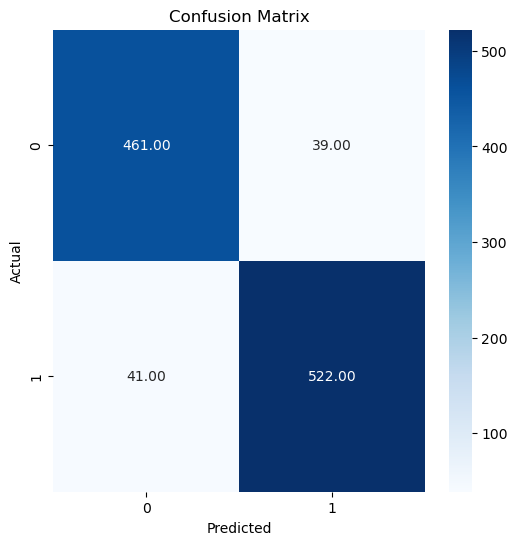

In [17]:
#plotting confusion matrix
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-validation Score: 0.9477508324084349
Cross-validation scores: [0.96941176 0.94588235 0.95058824 0.94117647 0.92       0.95764706
 0.94352941 0.94352941 0.96470588 0.94103774]
Mean Accuracy: 0.95
Standard Deviation: 0.01


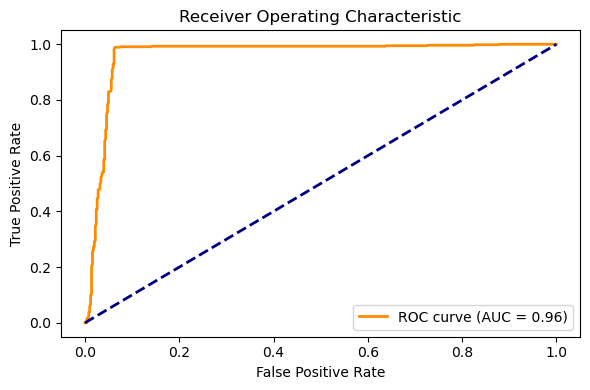

In [18]:
# Define your logistic regression model
reg = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score found by GridSearchCV
print("Best Cross-validation Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Perform k-fold cross-validation with the best model
k = 10
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=k, scoring="accuracy")

# Printing the cross-validation scores
print("Cross-validation scores:", scores)

# Calculating and printing the mean accuracy and its standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

# Plotting ROC curve
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# SVM

In [19]:

model = svm.SVC(kernel='linear')

model.fit(X_train_scaled,y_train)


SVC(kernel='linear')

In [20]:
#Printing the accuracy,precision and recall on the training data
train_predict = model.predict(X_train_scaled)
print("Accuracy on training data: ", metrics.accuracy_score(y_train, train_predict))
print("Precision on training data:", metrics.precision_score(y_train, train_predict))
print("Recall on training data:", metrics.recall_score(y_train, train_predict))



Accuracy on training data:  0.9421040244763473
Precision on training data: 0.9238881247134342
Recall on training data: 0.9618138424821002


In [21]:
#Printing the accuracy,precision,F1-score and recall on the testing data

test_predict=model.predict(X_test_scaled)
f1_test = f1_score(y_test, test_predict)
print("Accuracy on testing data: ", metrics.accuracy_score(y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(y_test, test_predict))
print("F1-score on testing data:", f1_test)



Accuracy on testing data:  0.9350893697083725
Precision on testing data: 0.9270833333333334
Recall on testing data:  0.9518716577540107
F1-score on testing data: 0.9393139841688655


TN=460, FP=42, FN=27, TP=534


<function matplotlib.pyplot.show(close=None, block=None)>

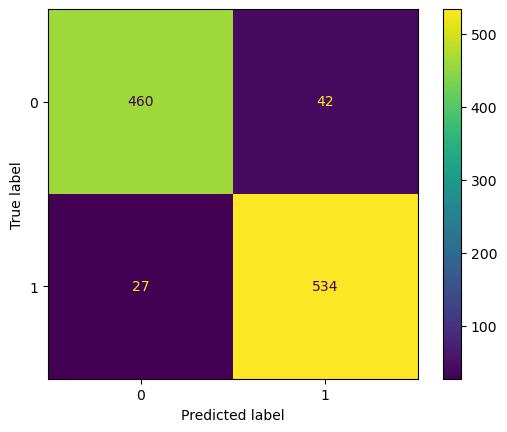

In [22]:
cm = metrics.confusion_matrix(y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-validation Score: 0.9465738068812432
Cross-validation scores: [0.94117647 0.96       0.95294118 0.93647059 0.91764706 0.94823529
 0.96235294 0.94117647 0.96705882 0.93867925]
Mean Accuracy: 0.95
Standard Deviation: 0.01


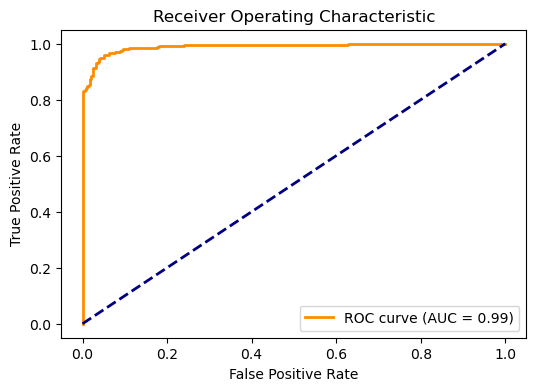

In [73]:
# Define your SVM model with probability=True
svm_model = SVC(probability=True)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Printing the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Printing the best cross-validation score found by GridSearchCV
print("Best Cross-validation Score:", grid_search.best_score_)

# Perform k-fold cross-validation with the best model
best_model = grid_search.best_estimator_
k = 10
svm_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=k, scoring="accuracy")

# Printing the cross-validation scores
print("Cross-validation scores:", svm_scores)

# Calculating and printing the mean accuracy and its standard deviation
mean_accuracy = np.mean(svm_scores)
std_accuracy = np.std(svm_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

# Compute probabilities of the positive class
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calculate AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# KNN  

In [23]:
# Define the KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy = ", accuracy_score(y_pred,y_test)*100, "%")
print("F1 score = ", f1_score(y_pred, y_test)*100, "%")
print("Recall = ", recall_score(y_pred, y_test)*100, "%")
print("Precision = ", precision_score(y_pred, y_test)*100, "%")


Accuracy =  93.50893697083725 %
F1 score =  93.93139841688655 %
Recall =  92.70833333333334 %
Precision =  95.18716577540107 %


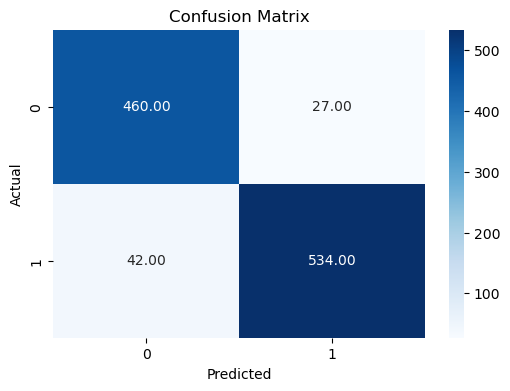

In [24]:
#printing confusion matrix
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt=".2f", cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-validation Score: 0.9138673695893452
Cross-validation scores: [0.89647059 0.90588235 0.88941176 0.90823529 0.90117647 0.91764706
 0.92       0.92       0.94352941 0.93632075]
Mean Accuracy: 0.91
Standard Deviation: 0.02


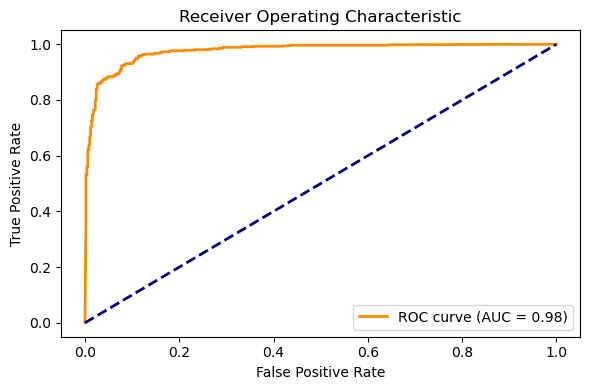

In [25]:
# Define your KNN model
knn_model = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for number of neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # Example distance metrics
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score found by GridSearchCV
print("Best Cross-validation Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Perform k-fold cross-validation with the best model
k = 10
scores = cross_val_score(best_model, X_train_scaled,y_train, cv=k, scoring="accuracy")

# Printing the cross-validation scores
print("Cross-validation scores:", scores)

# Calculating and printing the mean accuracy and its standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

# Plotting ROC curve
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# RANDOM FOREST 

In [26]:
 #Create a Random Forest classifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the scores in percentage format
print("Accuracy:", accuracy * 100, "%")
print("F1 score =", f1 * 100, "%")
print("Recall =", recall * 100, "%")
print("Precision =", precision * 100, "%")

Accuracy: 97.17779868297272 %
F1 score = 97.29241877256317 %
Recall = 96.07843137254902 %
Precision = 98.53747714808044 %


In [27]:
# Create a Pandas DataFrame from X_train_scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a Pandas Series with feature importances as data and feature names as index
feature_imp = pd.Series(feature_importances, index=X_train_scaled_df.columns)

# Sort the feature importances in descending order
feature_imp = feature_imp.sort_values(ascending=False)

# Print feature importances
print(feature_imp)


cibil_score                 0.811054
loan_term                   0.061025
loan_amount                 0.023915
loan_id                     0.017776
income_annum                0.014718
luxury_assets_value         0.014483
bank_asset_value            0.014057
residential_assets_value    0.013790
commercial_assets_value     0.013372
no_of_dependents            0.006882
education                   0.004664
self_employed               0.004263
dtype: float64


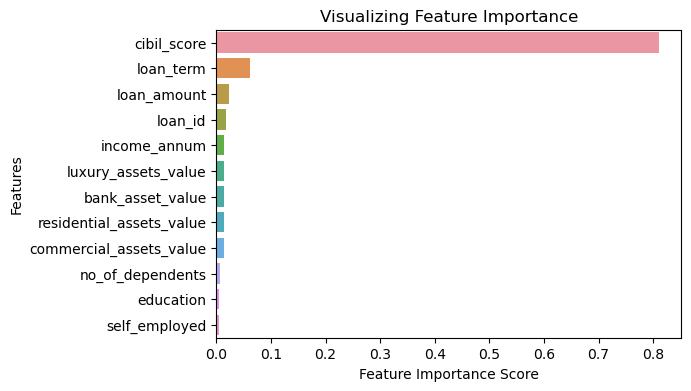

In [28]:
# Create a horizontal bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Feature Importance")

# Show plot
plt.show()


In [ ]:
# Define your Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  #values for number of estimators
    'max_depth': [None, 10, 20],  #values for maximum depth of trees
    'min_samples_split': [2, 5, 10],  #values for minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  #values for minimum samples required in a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score found by GridSearchCV
print("Best Cross-validation Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Perform k-fold cross-validation with the best model
k = 10
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=k, scoring="accuracy")

# Printing the cross-validation scores
print("Cross-validation scores:", scores)

# Calculating and printing the mean accuracy and its standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

# Plotting ROC curve
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


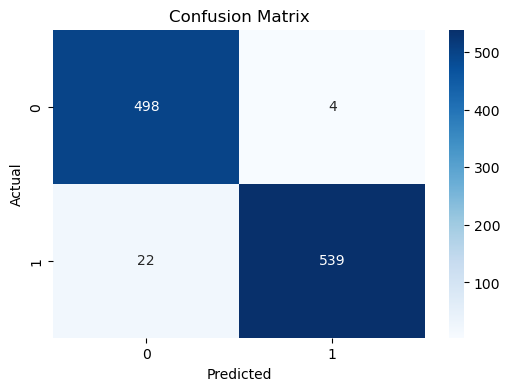

In [37]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# DECISION TREE

In [31]:
# Create a Decision Tree classifier with gini index as criterion
clf = DecisionTreeClassifier(criterion='gini')

# Train the model using the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the scores in percentage format
print("Accuracy:", accuracy * 100, "%")
print("F1 score =", f1 * 100, "%")
print("Recall =", recall * 100, "%")
print("Precision =", precision * 100, "%")



Accuracy: 97.64816556914393 %
F1 score = 97.75784753363229 %
Recall = 97.14795008912655 %
Precision = 98.37545126353791 %


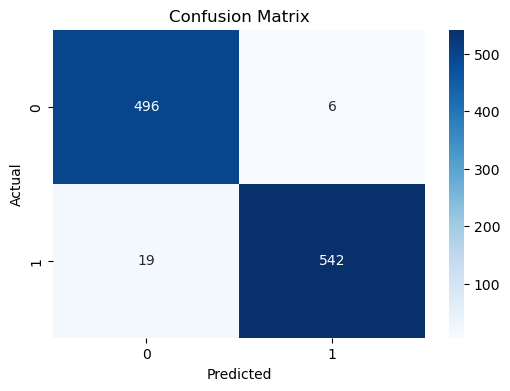

In [32]:
# Create a Decision Tree classifier with gini index as criterion
clf = DecisionTreeClassifier(criterion='gini')

# Train the model using the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-validation Score: 0.9842319644839069
Cross-validation scores: [0.98117647 0.99294118 0.98352941 0.98117647 0.97882353 0.98352941
 0.98823529 0.98588235 0.97647059 0.98349057]
Mean Accuracy: 0.98
Standard Deviation: 0.00


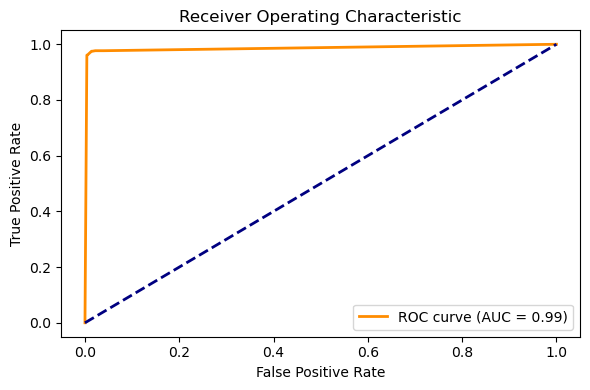

In [33]:
# Define your Decision Tree model          
dt_model = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Example values for criterion
    'max_depth': [None, 10, 20],  # Example values for maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Example values for minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Example values for minimum samples required in a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score found by GridSearchCV
print("Best Cross-validation Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Perform k-fold cross-validation with the best model
k = 10
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=k, scoring="accuracy")

# Printing the cross-validation scores
print("Cross-validation scores:", scores)

# Calculating and printing the mean accuracy and its standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

# Plotting ROC curve
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


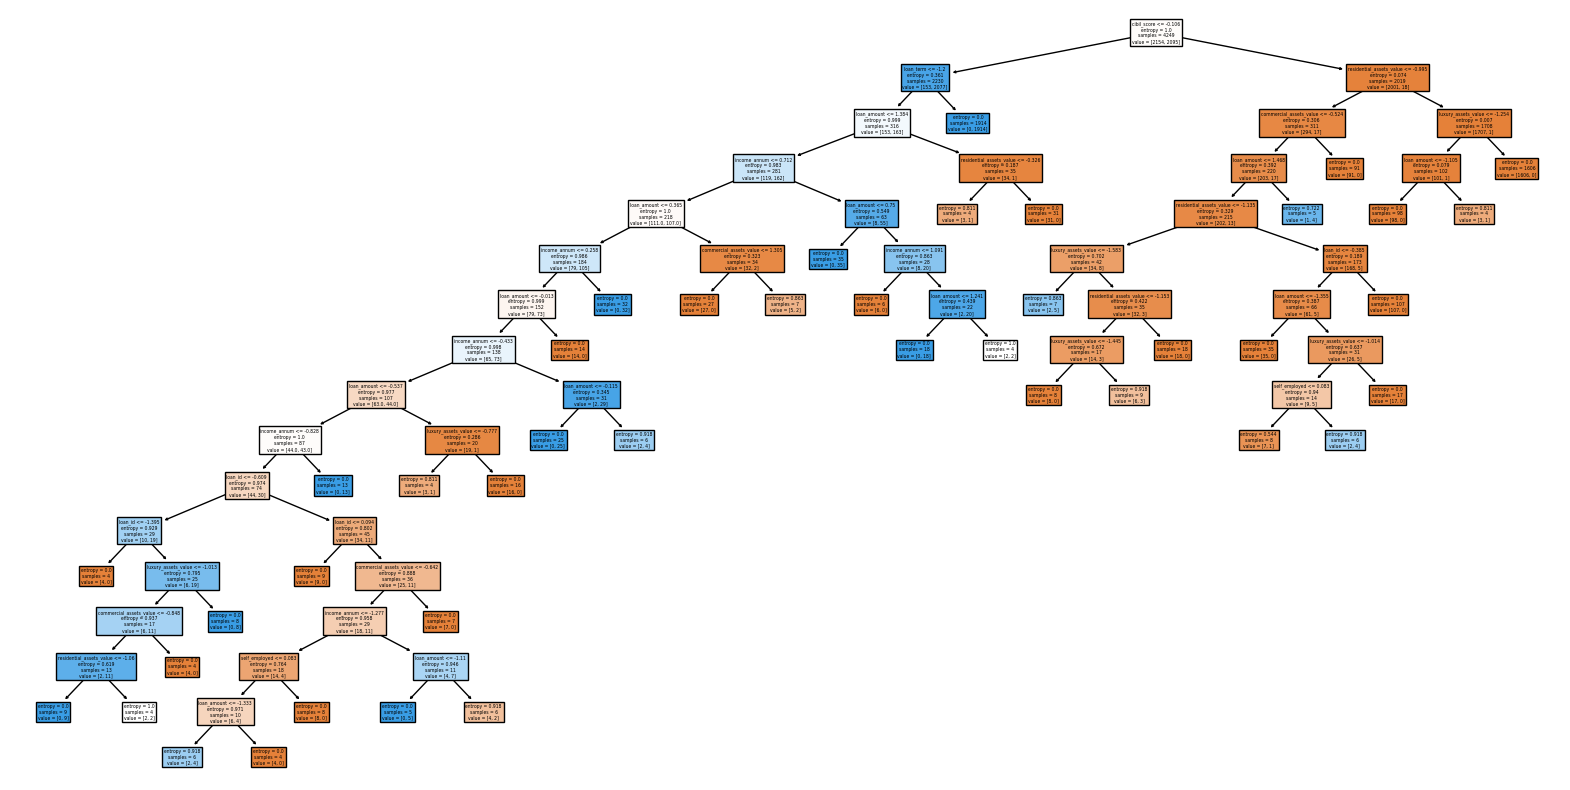

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns)
plt.show()


# MODELS COMPARISON

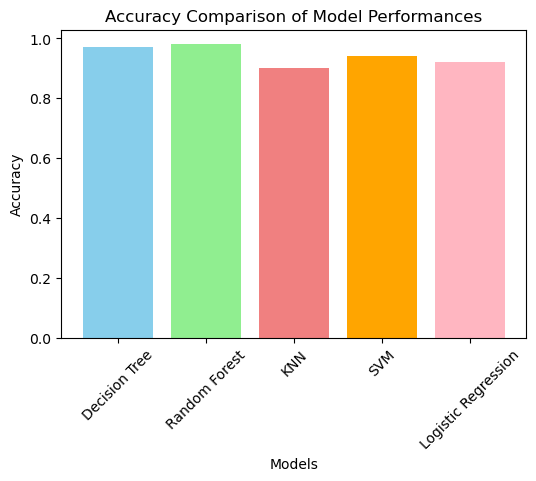

In [35]:
# Define the models and their corresponding accuracy scores
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression']
accuracy_scores = [0.97, 0.98, 0.90, 0.94, 0.92] 

# Define colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(models, accuracy_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()


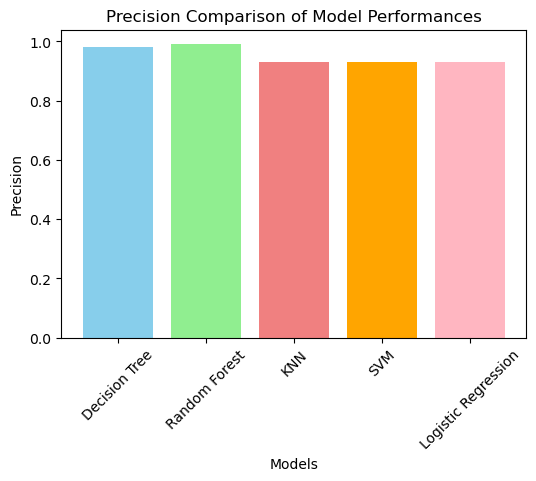

In [80]:
# Define the models and their corresponding precision scores
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression']
precision_scores = [0.98, 0.99, 0.93, 0.93, 0.93]

# Define colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(models, precision_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()


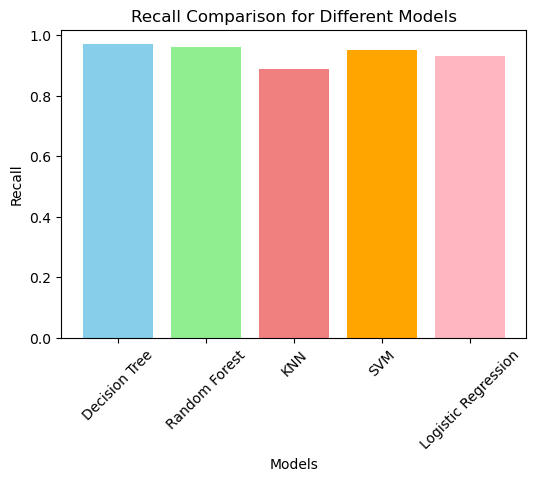

In [79]:
# Define the models and their corresponding recall scores
Recall = [0.97, 0.96, 0.89, 0.95, 0.93]  
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression']  # Example model names

# Define colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

#create barplot
plt.figure(figsize=(6, 4))
plt.bar(models, Recall, color=colors)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison for Different Models')
plt.xticks(rotation=45)
plt.show()


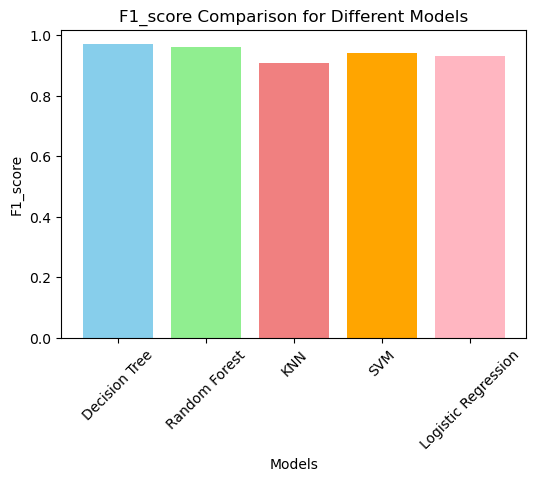

In [78]:
# Define the models and their corresponding F1-scores
F1_score = [0.97, 0.96, 0.91, 0.94, 0.93]  
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression']  # Example model names

# Define colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

#create barplot
plt.figure(figsize=(6, 4))
plt.bar(models, F1_score, color=colors)
plt.xlabel('Models')
plt.ylabel('F1_score')
plt.title('F1_score Comparison for Different Models')
plt.xticks(rotation=45)
plt.show()